In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)

In [2]:
sensor33_df = pd.read_csv('./data/sensor33.csv', names=('date', 'indicator'), parse_dates = ['date'])
cont33_df = pd.read_csv('./data/cont33.csv', names=('indicator', 'counter', 'date'), parse_dates = ['date'])
#cont33_df = cont33_df.drop('counter', axis=1)

In [3]:
MIN_DATE = min(sensor33_df.date.min(), cont33_df.date.min()).replace(hour=0, minute=0, second=0, microsecond=0)

In [4]:
sensor33_df['Датчик'] = 'sensor33'
cont33_df['Датчик'] = 'cont33'

In [5]:
df = pd.concat([sensor33_df, cont33_df], axis=0)
df = df.reset_index()
df['hours_'] = (df.date - MIN_DATE).dt.seconds / 3600

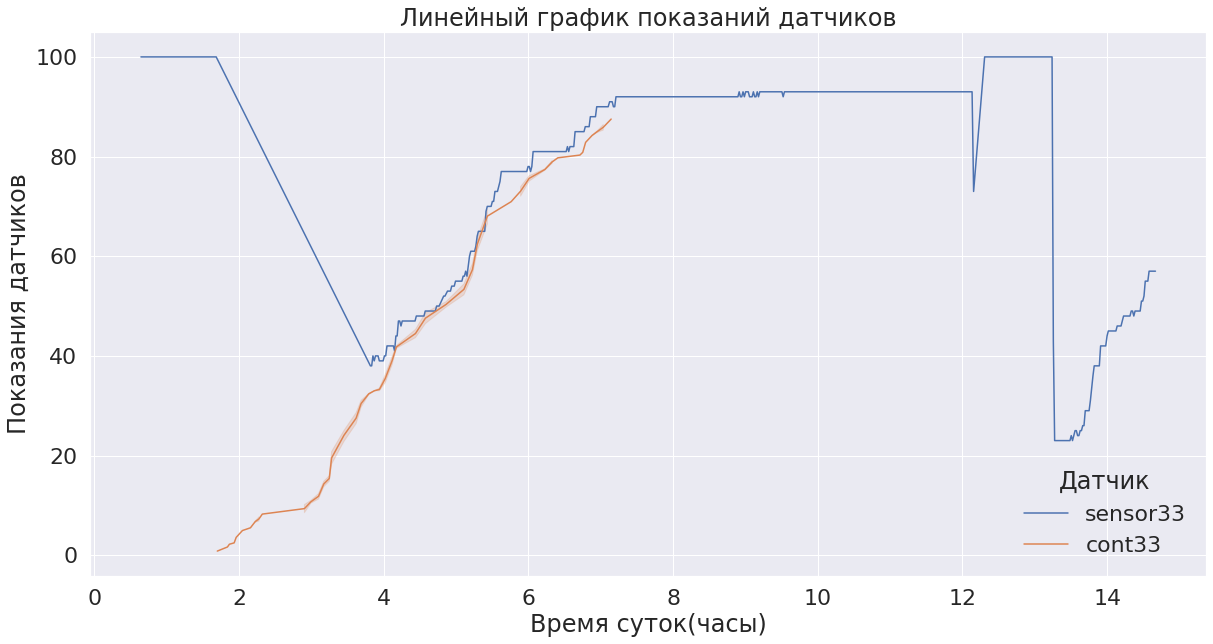

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=df, x='hours_', y='indicator', hue='Датчик')
ax.set_title('Линейный график показаний датчиков')
ax.set_ylabel('Показания датчиков')
ax.set_xlabel('Время суток(часы)')
#plt.savefig('./data/linear.png')
plt.show()

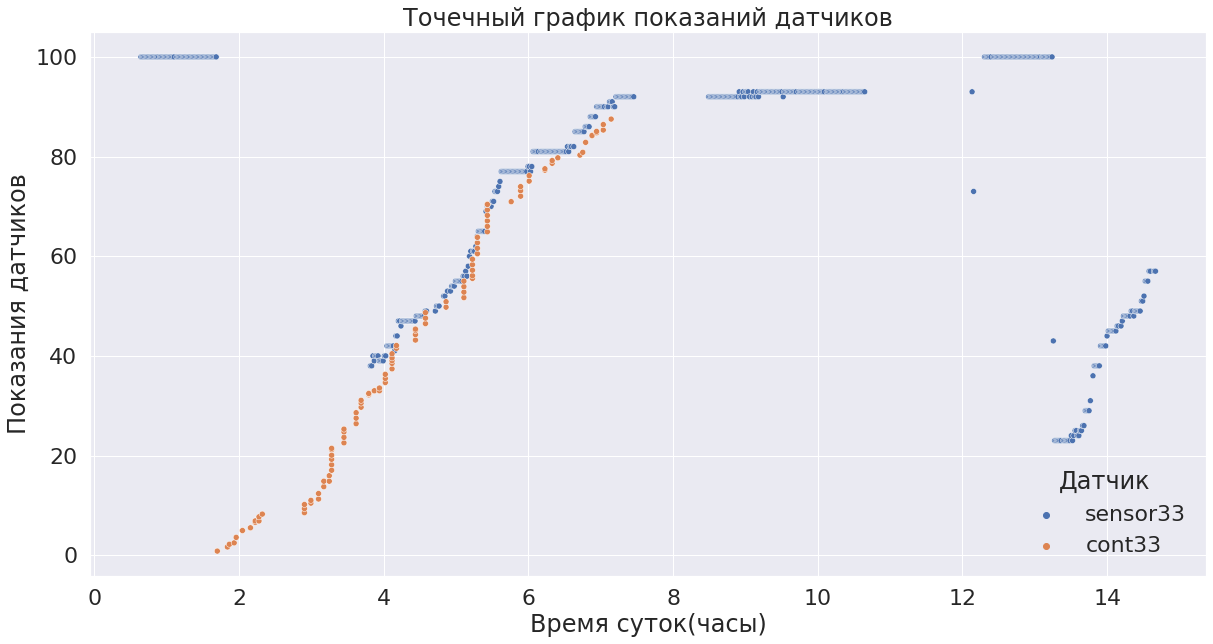

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x=df.hours_, y=df.indicator, hue=df['Датчик'])
ax.set_title('Точечный график показаний датчиков')
ax.set_ylabel('Показания датчиков')
ax.set_xlabel('Время суток(часы)')
#plt.savefig('./data/scatter.png')
plt.show()

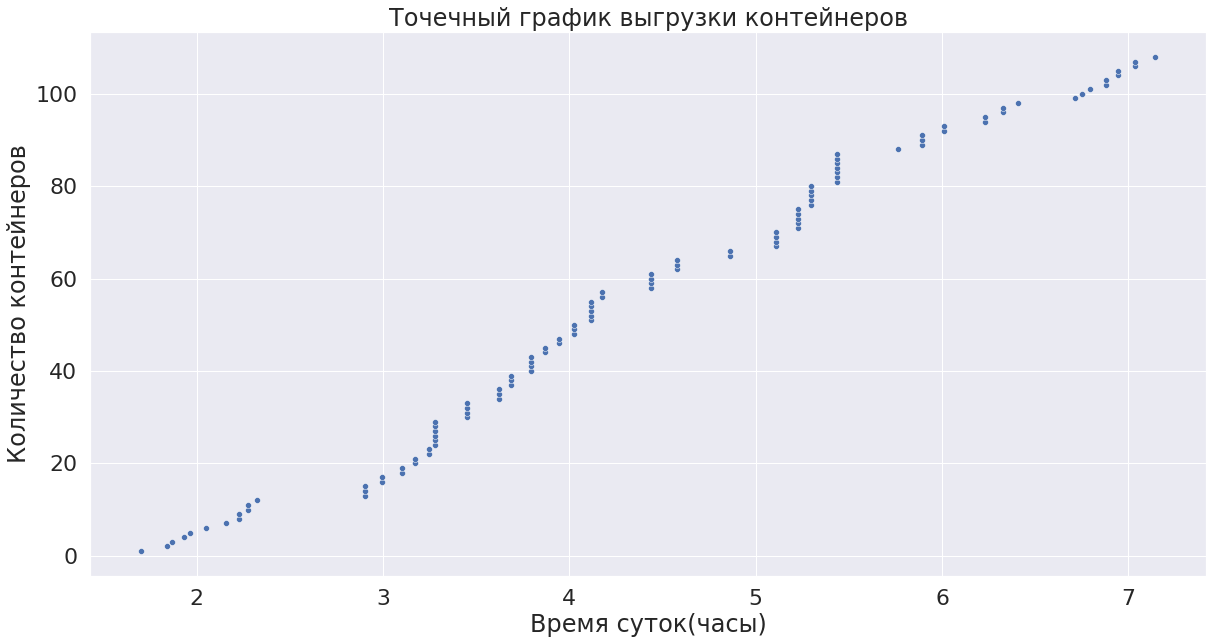

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x=df.hours_, y=df.counter)
ax.set_title('Точечный график выгрузки контейнеров')
ax.set_ylabel('Количество контейнеров')
ax.set_xlabel('Время суток(часы)')
#plt.savefig('./data/scatter_container.png')
plt.show()

In [9]:
# df.to_excel('output.xlsx')

In [10]:
#sensor33_df['hours_'] = (sensor33_df.date - MIN_DATE).dt.seconds / 3600
#cont33_df['hours_'] = (cont33_df.date - MIN_DATE).dt.seconds / 3600

#sensor33_df.to_excel('sensor33.xlsx')
#cont33_df.to_excel('cont33.xlsx')